# Exploratory Points: Sentiment Analysis of Shakespeare’s Plays


In this part we executed sentiment analysis of Shakespeare. <br /><br />
We made use of the AFINN library (https://github.com/fnielsen/afinn) which implements a dictionary-based approach to sentiment analysis - based on "AFINN Lexicon". The AFINN lexicon contains a list of words with corresponding valence values.<br />
Some of the algorithms for which <b>we entirely wrote our own code</b> are based on the senetiment anaylsis concepts presented in the paper "Nalisnick, Eric T., and Henry S. Baird. "Extracting Sentiment Networks from Shakespeare's Plays." 2013 12th International Conference on Document Analysis and Recognition. IEEE, 2013."<br />
Other algorithms like those for longitudinal sentiment analysis of individual plays trough time we developed entirely on our own.<br />

We start by importing neccessary libraries.<br />

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter

import numpy as np
import pandas as pd
import nltk
import string
from collections import OrderedDict

# Using AFINN library - pip install afinn
from afinn import Afinn

# Load the NLTK punkt tokenizer - uncomment the next line if you don't have the punkt tokenizer 
# installed - it will open a dialog that will allow you to do so.
#nltk.download()


In [2]:
# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
set2_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']

bold_colors = ['#FF0000', '#00FF00', '#FFAAAA', '#0000FF']
light_colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#00FF00']
cmap_light = ListedColormap(light_colors)
cmap_bold = ListedColormap(bold_colors)
dark2_cmap = ListedColormap(dark2_colors)
set2_cmap = ListedColormap(dark2_colors)
light_grey = np.array([float(248)/float(255)]*3)
shade_black = '#262626'

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 16
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

# Remove border function taken from CS109 2013 
######################################
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
def cible_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Make a target axis at 0,0 with ticks along the axis lines
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

<b>Reading in Shakespeare's plays:</b>

In [3]:
# Read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

<b>Extracting the text of'Hamlet':</b>

In [4]:
df_hamlet = df[df.Play=="hamlet"]
#df_hamlet.shape

alltext = ''
for text in df_hamlet['Utterance']:
    alltext += text + ' '

<b>Removing Punctuation and Tokenizing :</b>

In [5]:
translator = str.maketrans({key: None for key in string.punctuation})
no_punctuation = alltext.translate(translator)
tokens = nltk.word_tokenize(no_punctuation)

Here we define a "sliding window". We initially set the sliding window to encompass first N=500 words of the play. We then "move" this window, word-by-word, troughout the play and calculate the sentiment score for the words in each of these windows. This allows us to obtain a fine-grained analysis of the sentiments.<br />
<br />
For example, the following text:<br /> 
> "Rob Haris doing Shakespeare sentiment analysis" 

with a sliding window of N=3 would give us the following sliding-window instances:<br />

> Rob Haris doing

> Haris doing Shakespeare

> doing Shakespeare sentiment

> Shakespeare sentiment analysis


In [6]:
N = 500
grams = [tokens[i:i+N] for i in range(len(tokens)-N+1)]

for i in range (len(grams)):
    grams[i] = " ".join(grams[i])
    

grams_df = pd.DataFrame(grams)
grams_df = grams_df.rename(columns = {0:'Speech'})

We calculate sentiment scores for each othe sliding-window instances.

In [7]:
afinn_scores = [afinn.score(text) for text in grams_df.Speech]

grams_df['afinn'] = afinn_scores

Plotting the sentiment movement troughout the play:

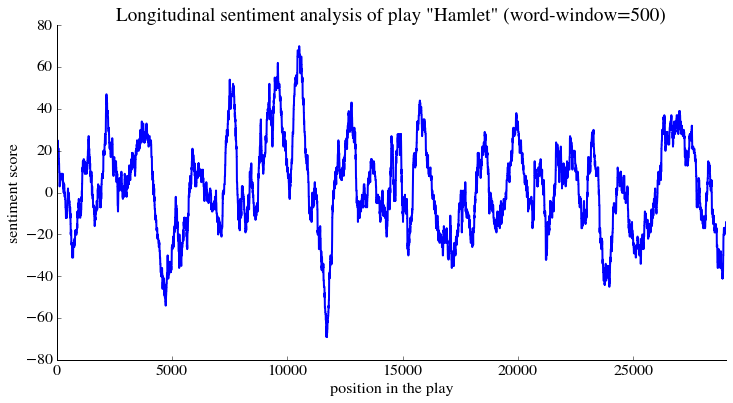

In [8]:
plt.figure(figsize=(12, 6))

grams_df['afinn'].plot()

plt.title('Longitudinal sentiment analysis of play "Hamlet" (word-window=500)')
plt.xlabel('position in the play')
plt.ylabel('sentiment score')
remove_border()
plt.show()

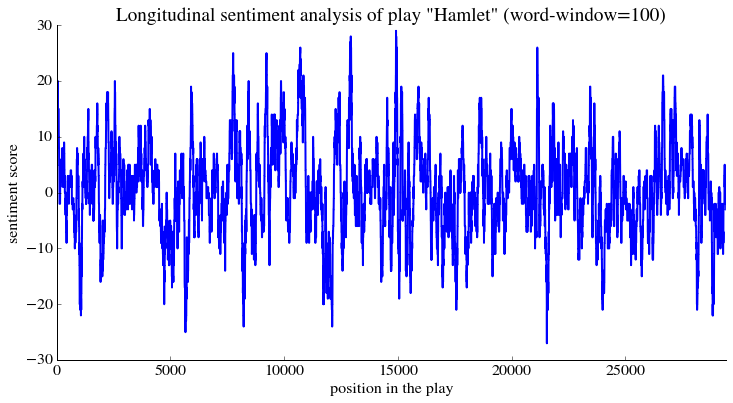

In [9]:
# Re-read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

#################################

df_hamlet = df[df.Play=="hamlet"]
df_hamlet.shape

alltext = ''
for text in df_hamlet['Utterance']:
    alltext += text + ' '

#################################

translator = str.maketrans({key: None for key in string.punctuation})
no_punctuation = alltext.translate(translator)
tokens = nltk.word_tokenize(no_punctuation)

#################################

N = 100
grams = [tokens[i:i+N] for i in range(len(tokens)-N+1)]

for i in range (len(grams)):
    grams[i] = " ".join(grams[i])
    

grams_df = pd.DataFrame(grams)
grams_df = grams_df.rename(columns = {0:'Speech'})

#################################

afinn_scores = [afinn.score(text) for text in grams_df.Speech]

grams_df['afinn'] = afinn_scores

#################################

plt.figure(figsize=(12, 6))

grams_df['afinn'].plot()

plt.title('Longitudinal sentiment analysis of play "Hamlet" (word-window=100)')
plt.xlabel('position in the play')
plt.ylabel('sentiment score')
remove_border()
plt.show()

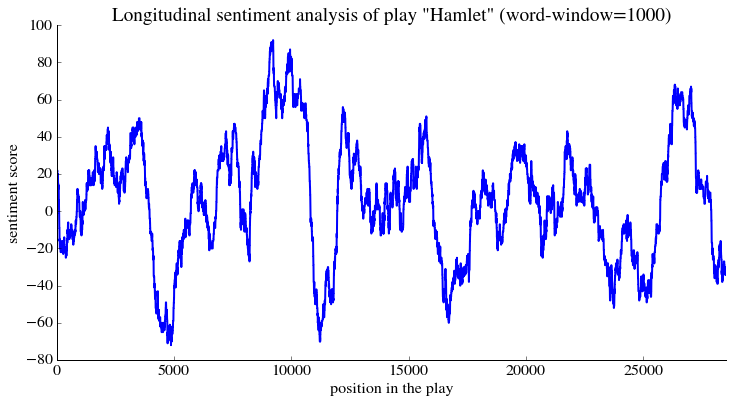

In [10]:
# Read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

#################################

df_hamlet = df[df.Play=="hamlet"]
df_hamlet.shape

alltext = ''
for text in df_hamlet['Utterance']:
    alltext += text + ' '

#################################

translator = str.maketrans({key: None for key in string.punctuation})
no_punctuation = alltext.translate(translator)
tokens = nltk.word_tokenize(no_punctuation)

#################################

N = 1000
grams = [tokens[i:i+N] for i in range(len(tokens)-N+1)]

for i in range (len(grams)):
    grams[i] = " ".join(grams[i])
    

grams_df = pd.DataFrame(grams)
grams_df = grams_df.rename(columns = {0:'Speech'})

#################################

afinn_scores = [afinn.score(text) for text in grams_df.Speech]

grams_df['afinn'] = afinn_scores

#################################

plt.figure(figsize=(12, 6))

grams_df['afinn'].plot()

plt.title('Longitudinal sentiment analysis of play "Hamlet" (word-window=1000)')
plt.xlabel('position in the play')
plt.ylabel('sentiment score')
remove_border()
plt.show()

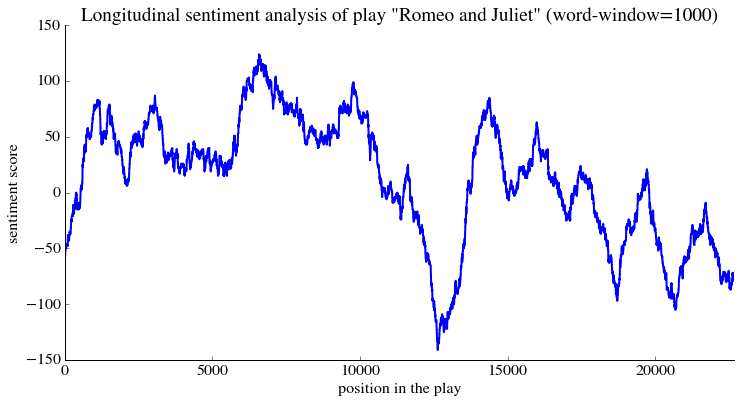

In [11]:
# Read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

#################################

df_hamlet = df[df.Play=="r_and_j"]
df_hamlet.shape

alltext = ''
for text in df_hamlet['Utterance']:
    alltext += text + ' '

#################################

translator = str.maketrans({key: None for key in string.punctuation})
no_punctuation = alltext.translate(translator)
tokens = nltk.word_tokenize(no_punctuation)

#################################

N = 1000
grams = [tokens[i:i+N] for i in range(len(tokens)-N+1)]

for i in range (len(grams)):
    grams[i] = " ".join(grams[i])
    

grams_df = pd.DataFrame(grams)
grams_df = grams_df.rename(columns = {0:'Speech'})

#################################

afinn_scores = [afinn.score(text) for text in grams_df.Speech]

grams_df['afinn'] = afinn_scores

#################################

plt.figure(figsize=(12, 6))

grams_df['afinn'].plot()

plt.title('Longitudinal sentiment analysis of play "Romeo and Juliet" (word-window=1000)')
plt.xlabel('position in the play')
plt.ylabel('sentiment score')
remove_border()
plt.show()

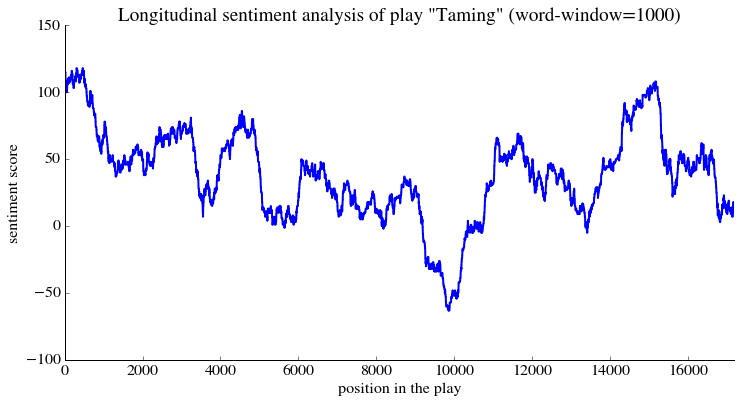

In [12]:
# Read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

#################################

df_hamlet = df[df.Play=="taming"]
df_hamlet.shape

alltext = ''
for text in df_hamlet['Utterance']:
    alltext += text + ' '

#################################

translator = str.maketrans({key: None for key in string.punctuation})
no_punctuation = alltext.translate(translator)
tokens = nltk.word_tokenize(no_punctuation)

#################################

N = 1000
grams = [tokens[i:i+N] for i in range(len(tokens)-N+1)]

for i in range (len(grams)):
    grams[i] = " ".join(grams[i])
    

grams_df = pd.DataFrame(grams)
grams_df = grams_df.rename(columns = {0:'Speech'})

#################################

afinn_scores = [afinn.score(text) for text in grams_df.Speech]

grams_df['afinn'] = afinn_scores

#################################

plt.figure(figsize=(12, 6))

grams_df['afinn'].plot()

plt.title('Longitudinal sentiment analysis of play "Taming" (word-window=1000)')
plt.xlabel('position in the play')
plt.ylabel('sentiment score')
remove_border()
plt.show()

## Differentiating comedies from tragedies

The paper first attempts to differentiate comedies from tragedies based on the summed valence for each play.

In [13]:
awv = {}

for play in df.Play.unique():
    dfp = df[df['Play']==play]

    # Sum the valences for each of the utterances
    sum_valence = dfp.afinn.sum()
    
    # Generate one big string for the full play
    alltext = ''
    for text in dfp['Utterance']:
        alltext += text + ' '
    
    
    # The following lines can be added if you wish to take into account the play's length
    #
    
    # Create a dictionary using a comprehension - this maps every character from
    # string.punctuation to None. Initialize a translation object from it.
    #translator = str.maketrans({key: None for key in string.punctuation})

    # Remove the punctuation using the translator
    #no_punctuation = alltext.translate(translator)
    
    # Split the play into tokens
    #tokens = nltk.word_tokenize(no_punctuation)

    # Calculate the number of words in the play
    #len_play = len(tokens)
    
    
    # Find the number of words in AFINN that are in the play
    words_in_afinn = afinn.find_all(alltext)


    # Calculate the average word valence
    # The paper seems to infer there are two methods to calculate it:
    # i) "Fig. 1. For each play the valence for each word was summed and then divided by the number
    # of words in both the word list (AFINN) and the respective play."
    # ii) "...  by summing the valence values for all words in the play and then dividing by the number 
    # of the play’s words in AFINN"
    #
    # We've chosen the later.
    awv[play] = (sum_valence / len(words_in_afinn)) 

    
# Define the list of tragedies and comedies in the order given in the paper
tragedies = ['titus','r_and_j', 'j_caesar', 'hamlet', 'othello', 'timon', 'lear', 'macbeth', 'a_and_c', 'coriolan']
comedies = ['all_well', 'as_you', 'com_err', 'lll', 'm_for_m', 'merchant', 'm_wives', 'dream', 'much_ado', 'pericles',
           'taming', 't_night', 'two_gent', 'win_tale']
all_labels = comedies + tragedies 

awv_sorted = OrderedDict()
for name in comedies:
    awv_sorted[name] = awv[name]
    
for name in tragedies:
    awv_sorted[name] = awv[name]

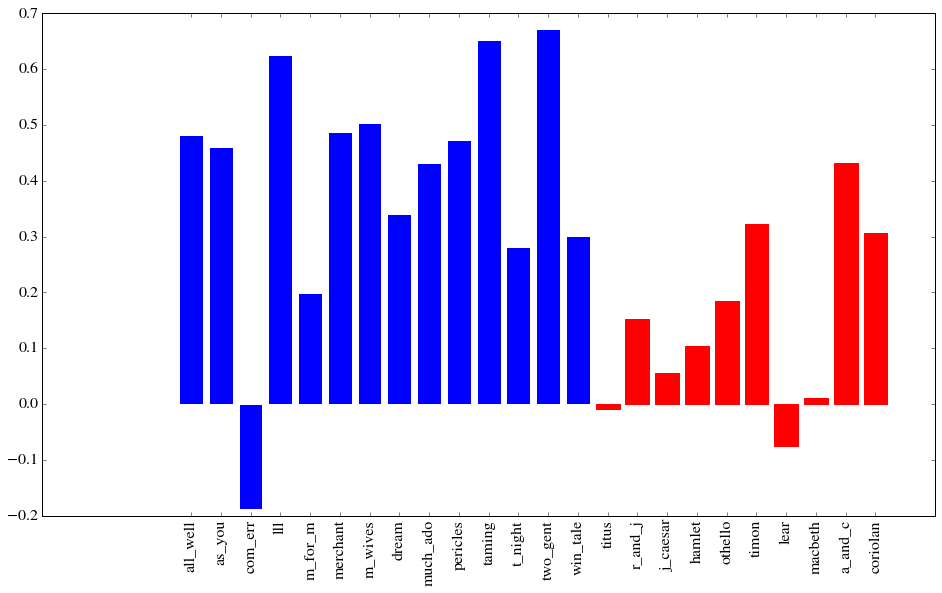

In [14]:
plt.rcParams["figure.figsize"] = (16,9)

bar=plt.bar(range(len(awv_sorted)), awv_sorted.values(), align='center', color='blue')

# Change the color of the tragedies to red
for i in range(len(comedies),len(comedies)+len(tragedies)):
    bar[i].set_color('red')

plt.xticks(range(len(all_labels)), all_labels)

ax = plt.axes()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

## Character-to-Character Analysis

The paper next attempts to determine the sentiment between characters. The character-to-character sentiment is determined by "summing the valence values over each instance of continuous speech and then assumed that sentiment was directed towards the character that spoke immediately before the current speaker." Our data structure is ordered by speaker and so we can simply iterate through it and calculate the valence.


In [15]:
from_character = {}
speaker = ''
previous_speaker = ''

# We'll look at character interactions in Hamlet
dfp = df[df.Play=='hamlet']

# Iterate through all Utterances
for i, r in dfp.iterrows():

    # Determine who is speaking
    speaker = r['Speaker']

    # Only calculate if someone spoke before
    if len(previous_speaker) > 0:
        # Get the list of speakers that this speaker has spoken to
        if speaker in from_character:
            to_character = from_character[speaker]
        else:
            to_character = {}
            from_character[speaker] = to_character

        # Get the running total of sentiment valence so far and add the new valence
        if previous_speaker in to_character:
            to_character[previous_speaker] += r['afinn']
        else:
            to_character[previous_speaker] = r['afinn']

    # The current speaker will become the previous speaker for the next utterance
    previous_speaker = speaker

In [16]:
# Print out Hamlet's Sentiment Valence Sum 
from IPython.display import display, HTML
df_print = pd.DataFrame(list(from_character['HAMLET'].items()), columns=['Speaker', 'Valence'])

df_print.sort_values('Valence',inplace=True, ascending=False)
display(df_print)

,Speaker,Valence
10,QUEEN GERTRUDE,37.0
13,GUILDENSTERN,27.0
14,HORATIO,21.0
16,LORD POLONIUS,20.0
7,First Player,16.0
19,ROSENCRANTZ,10.0
8,OPHELIA,9.0
18,MARCELLUS,8.0
1,Ghost,7.0
3,Captain,7.0


In [17]:
# Print out Hamlet's Sentiment Valence Sum 

df_print2 = pd.DataFrame(list(from_character['GUILDENSTERN'].items()), columns=['Speaker', 'Valence'])

df_print2.sort_values('Valence',inplace=True, ascending=False)
display(df_print2)

,Speaker,Valence
0,HAMLET,28.0
3,ROSENCRANTZ,9.0
1,QUEEN GERTRUDE,5.0
2,KING CLAUDIUS,-1.0


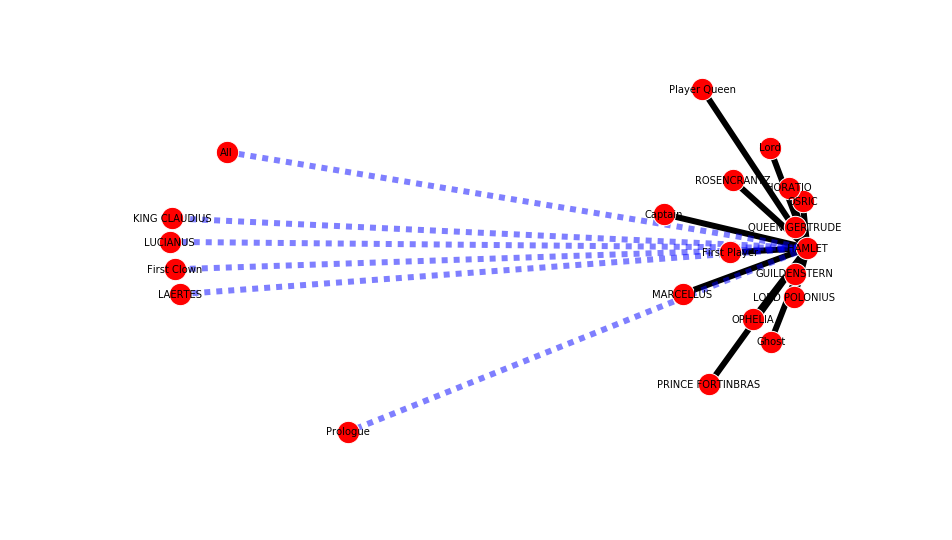

In [18]:
import networkx as nx

G=nx.Graph()

for i, r in df_print.iterrows():
    G.add_edge('HAMLET',r['Speaker'],weight=r['Valence'])


elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=500)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.show() # display